In [3]:
# === Parameters ===
csv_path = "win_rate.csv"   # path to your CSV (relative to notebook or absolute)
sort_by = "model"           # options: "model", "mafia", "town", "overall"
show_values = True          # annotate bars with numeric values
dpi = 160                   # image DPI for saved figures
save_dir = "plots"          # directory to save PNG files
display_figures = True      # whether to display figures inline after saving

In [4]:
#%pip install matplotlib
import csv
from pathlib import Path
from typing import List, Dict

import matplotlib.pyplot as plt

def _to_float(x):
    try:
        return float(x)
    except Exception:
        return 0.0

def read_win_rate_csv(csv_path: Path) -> List[Dict[str, str]]:
    rows: List[Dict[str, str]] = []
    with csv_path.open("r", encoding="utf-8") as f:
        reader = csv.DictReader(f)
        for r in reader:
            rows.append(r)
    return rows

def annotate_bars(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v, f"{v:.3f}", ha="center", va="bottom", fontsize=9, rotation=0)

def make_bar_figure(title: str, models: List[str], values: List[float], ylabel: str, save_path: Path, show_vals: bool, display: bool):
    fig = plt.figure()  # one plot per figure
    ax = plt.gca()
    x = range(len(models))
    ax.bar(x, values)  # do not set specific colors or styles
    ax.set_xticks(list(x))
    ax.set_xticklabels(models, rotation=45, ha="right")
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    fig.tight_layout()
    if show_vals:
        annotate_bars(ax, values)
    fig.savefig(save_path, dpi=dpi)
    if display:
        plt.show()
    plt.close(fig)

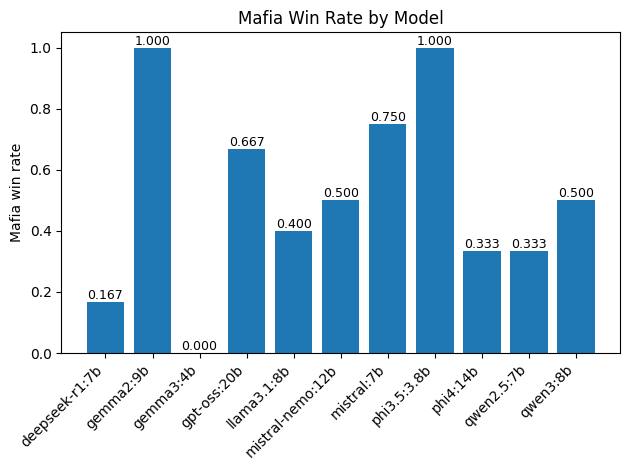

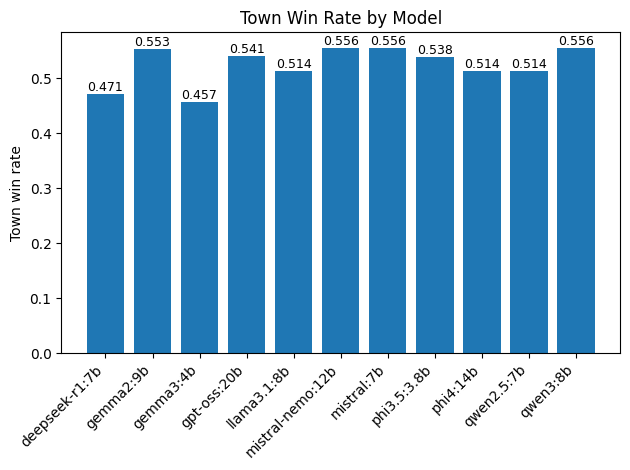

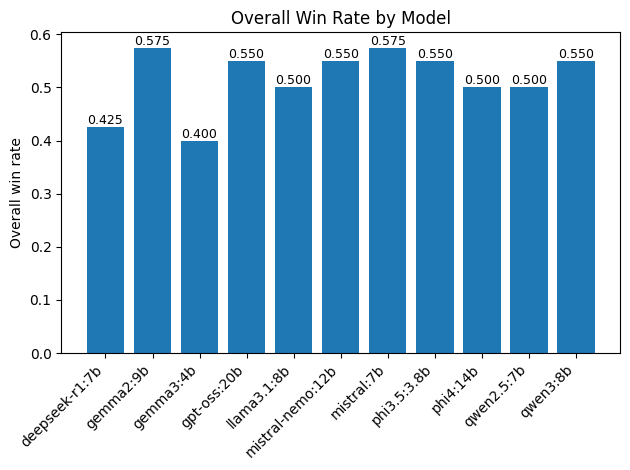

Saved figures to: /u/marissa/liars-bar-llm-amongus/plots


In [6]:
csv_file = Path(csv_path)
if not csv_file.exists():
    raise FileNotFoundError(f"CSV not found: {csv_file.resolve()}")

rows = read_win_rate_csv(csv_file)
if not rows:
    raise RuntimeError("No rows found in CSV.")

# Extract fields (be forgiving about types)
data = []
for r in rows:
    data.append({
        "model": str(r.get("model", "")).strip(),
        "mafia_rate": _to_float(r.get("mafia_win_rate", 0)),
        "town_rate": _to_float(r.get("townsperson_win_rate", 0)),
        "overall_rate": _to_float(r.get("overall_win_rate", 0)),
    })

# Sort
key = sort_by.lower().strip()
if key == "model":
    data.sort(key=lambda d: d["model"].lower())
elif key == "mafia":
    data.sort(key=lambda d: d["mafia_rate"], reverse=True)
elif key == "town":
    data.sort(key=lambda d: d["town_rate"], reverse=True)
elif key == "overall":
    data.sort(key=lambda d: d["overall_rate"], reverse=True)
else:
    raise ValueError("sort_by must be one of: model, mafia, town, overall")

models = [d["model"] for d in data]
mafia_vals = [d["mafia_rate"] for d in data]
town_vals = [d["town_rate"] for d in data]
overall_vals = [d["overall_rate"] for d in data]

# Make output directory
out_dir = Path(save_dir)
out_dir.mkdir(parents=True, exist_ok=True)

# Plot and save
make_bar_figure(
    title="Mafia Win Rate by Model",
    models=models,
    values=mafia_vals,
    ylabel="Mafia win rate",
    save_path=out_dir / "mafia_win_rate.png",
    show_vals=show_values,
    display=display_figures
)

make_bar_figure(
    title="Town Win Rate by Model",
    models=models,
    values=town_vals,
    ylabel="Town win rate",
    save_path=out_dir / "town_win_rate.png",
    show_vals=show_values,
    display=display_figures
)

make_bar_figure(
    title="Overall Win Rate by Model",
    models=models,
    values=overall_vals,
    ylabel="Overall win rate",
    save_path=out_dir / "overall_win_rate.png",
    show_vals=show_values,
    display=display_figures
)

print(f"Saved figures to: {out_dir.resolve()}")